In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
# Tendência - direção para onde os dados estão indo
# Sazonalidade - Entender como funcionam as oscilações na base de dados
# Residuo - O que sobra do sinal

In [ ]:
dados = pd.read_csv( 'https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv' )
dados.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [ ]:
dados.index = pd.to_datetime( dados['DATE'], format = '%m-%d-%Y' )
dados.head()

,DATE,Value
DATE,,
1985-01-01,01-01-1985,72.5052
1985-02-01,02-01-1985,70.6720
1985-03-01,03-01-1985,62.4502
1985-04-01,04-01-1985,57.4714
1985-05-01,05-01-1985,55.3151


In [ ]:
dados.drop( 'DATE', inplace = True, axis = 1 )
dados.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
dados.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

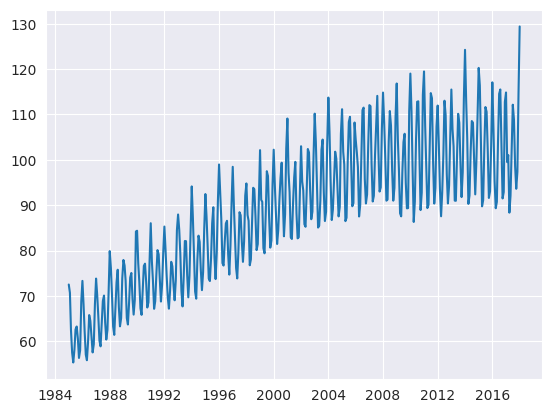

In [ ]:
plt.plot( dados.index, dados['Value'] )

In [ ]:
resultados = seasonal_decompose( dados )

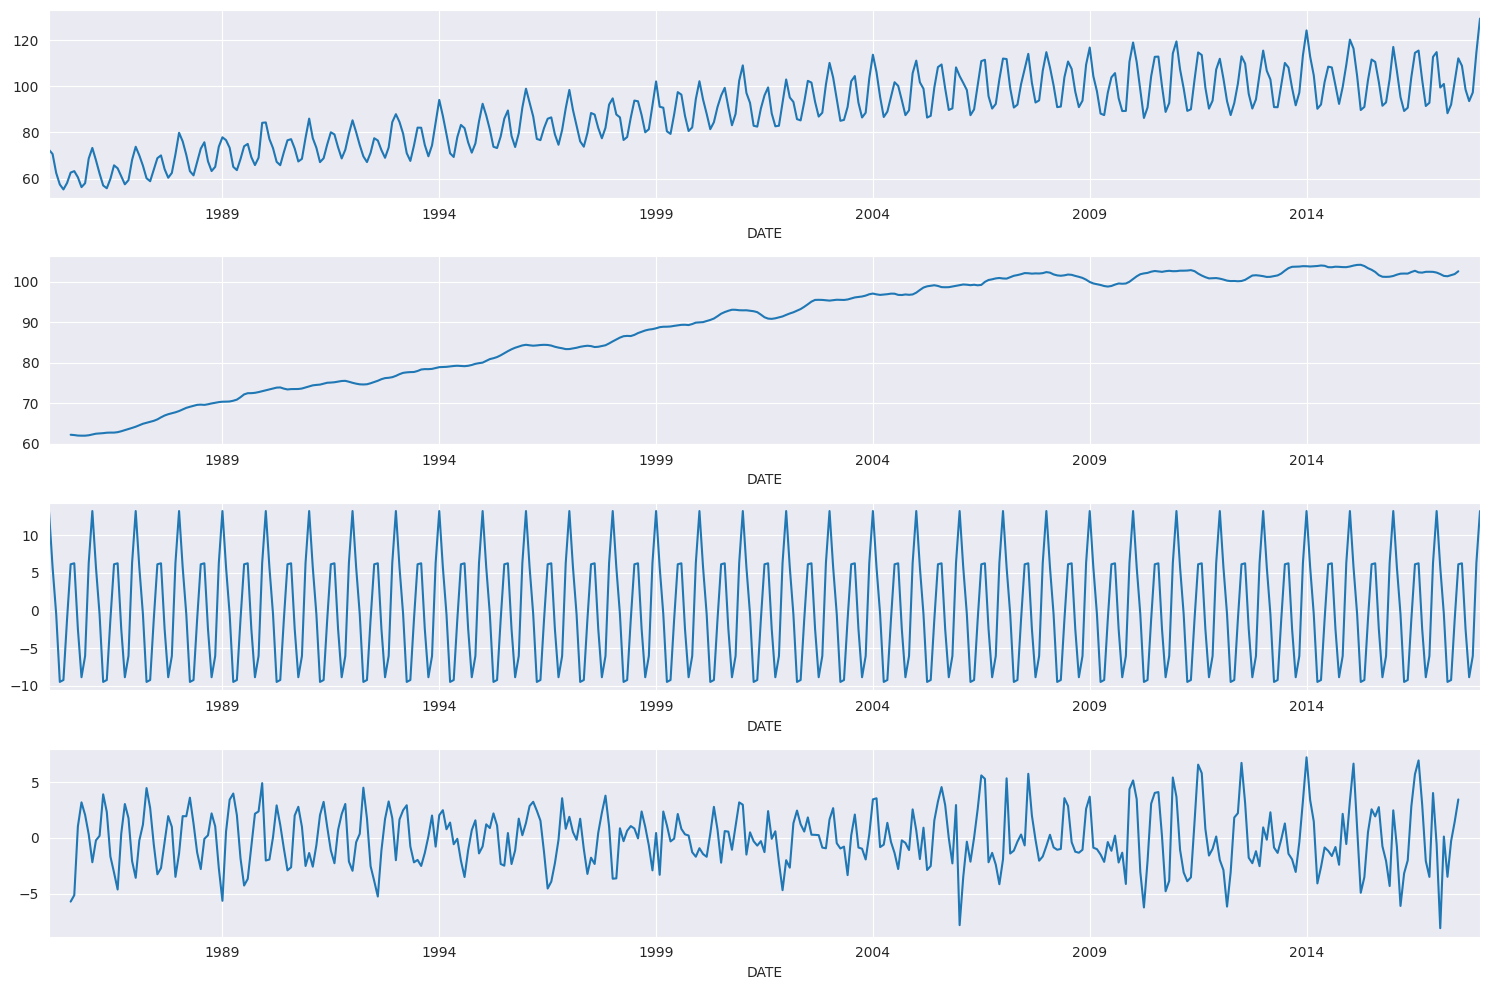

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots( 4, 1, figsize = (15,10) )

resultados.observed.plot( ax = ax1 )
resultados.trend.plot( ax = ax2 )
resultados.seasonal.plot( ax = ax3 )
resultados.resid.plot( ax = ax4 )

plt.tight_layout()

In [ ]:
# Estacionário ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese nula (não é estacionária)
# H1 - Hipótese alternativa (rejeição da hipótese nula - é estacionária)

# P Value = 0.05 (5%), então rejeitamos H0 com o nível de confiança de 95%

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
sns.set_style( 'darkgrid' )

In [ ]:
x = dados['Value'].values

In [ ]:
result = adfuller(x)

print( 'Teste ADF' )
print( f'Teste estatístico: {result[0]}' )
print( f'P-Value: {result[1]}' )
print( f'Valores críticos:' )

for key, value in result[4].items():
  print( f'\t{key}: {value}' )

Teste ADF
Teste estatístico: -2.256990350047235
P-Value: 0.1862146911658712
Valores críticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


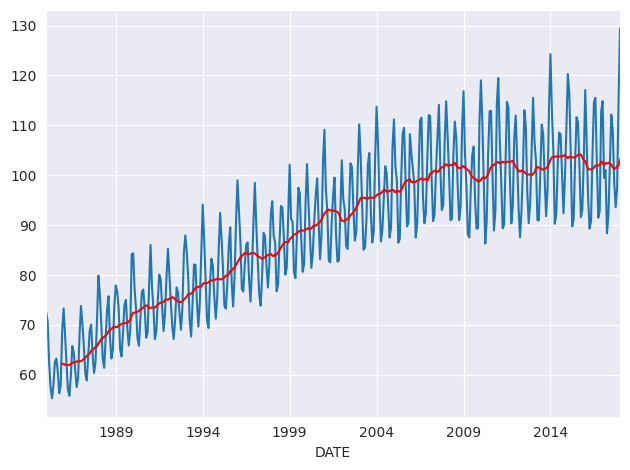

In [ ]:
ma = dados.rolling(12).mean()

f, ax = plt.subplots()
dados.plot( ax = ax, legend = False )
ma.plot( ax = ax, legend = False, color = 'r' )
plt.tight_layout()


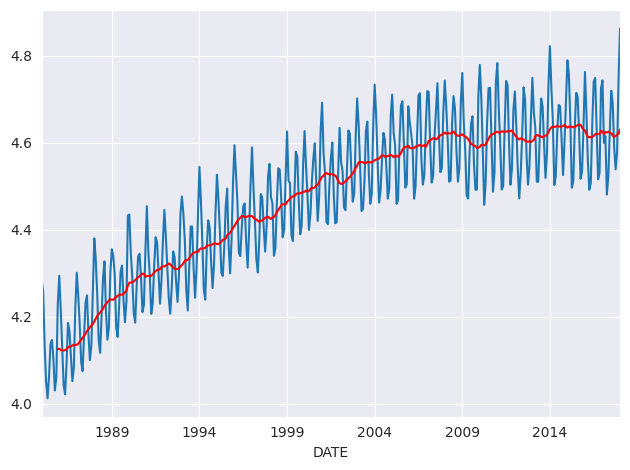

In [ ]:
dados_log = np.log( dados )
ma_log = dados_log.rolling(12).mean()

f, ax = plt.subplots()
dados_log.plot( ax = ax, legend = False )
ma_log.plot( ax = ax, legend = False, color = 'r' )
plt.tight_layout()


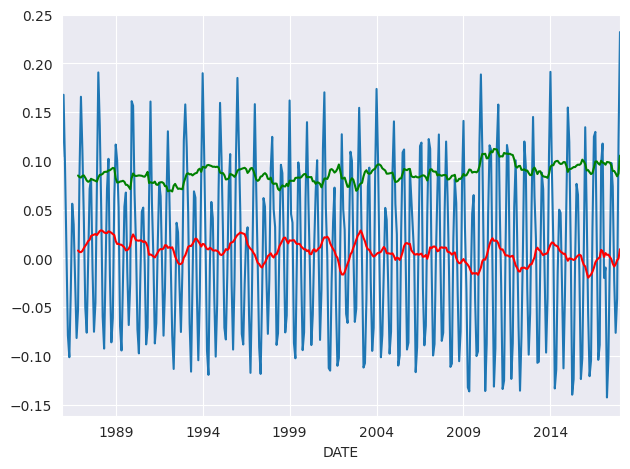

In [ ]:
dados_s = ( dados_log - ma_log ).dropna()

ma_s = dados_s.rolling(12).mean()

std = dados_s.rolling(12).std()

f, ax = plt.subplots()
dados_s.plot( ax = ax, legend = False )
ma_s.plot( ax = ax, legend = False, color = 'r' )
std.plot( ax = ax, legend = False, color = 'g' )
plt.tight_layout()


In [ ]:
x_s = dados_s['Value'].values
result_s = adfuller(x_s)

print( 'Teste ADF' )
print( f'Teste estatístico: {result_s[0]}' )
print( f'P-Value: {result_s[1]}' )
print( f'Valores críticos:' )

for key, value in result_s[4].items():
  print( f'\t{key}: {value}' )

Teste ADF
Teste estatístico: -5.2115861853654355
P-Value: 8.32563975994627e-06
Valores críticos:
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Teste ADF
Teste estatístico: -7.651129568145172
P-Value: 1.788126735435739e-11
Valores críticos:
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


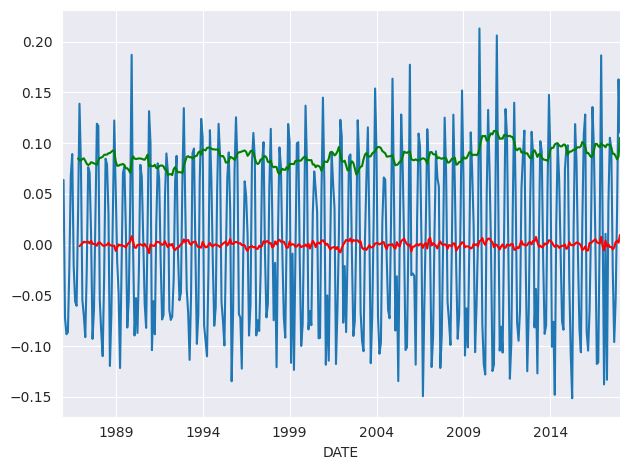

In [ ]:
dados_diff = dados_s.diff(1)

ma_diff = dados_diff.rolling(12).mean()

std_diff = dados_s.rolling(12).std()

f, ax = plt.subplots()
dados_diff.plot( ax = ax, legend = False )
ma_diff.plot( ax = ax, legend = False, color = 'r' )
std_diff.plot( ax = ax, legend = False, color = 'g' )
plt.tight_layout()

x_diff = dados_diff['Value'].dropna().values
result_diff = adfuller(x_diff)

print( 'Teste ADF' )
print( f'Teste estatístico: {result_diff[0]}' )
print( f'P-Value: {result_diff[1]}' )
print( f'Valores críticos:' )

for key, value in result_diff[4].items():
  print( f'\t{key}: {value}' )


In [ ]:
# ARIMA
# AR - Autoregressivo
# I - Integrado
# MA - Moving Average

In [ ]:
# A( x, y, z ) - ACF, PACF

# ACF - Autocorrelação
# PACF - Autocorrelação parcial

In [ ]:
lag_acf = acf( dados_diff.dropna(), nlags = 25 )
lag_pacf = pacf( dados_diff.dropna(), nlags = 25 )

In [ ]:
# 5% ACF

# 1.96 / sqrt( N - d )
# N - É o número de pontos no Dataframe
# d - É o número de vezes que nós diferenciamos o Dataframe

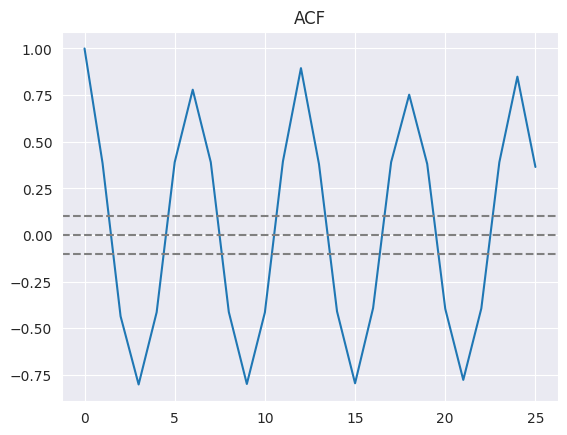

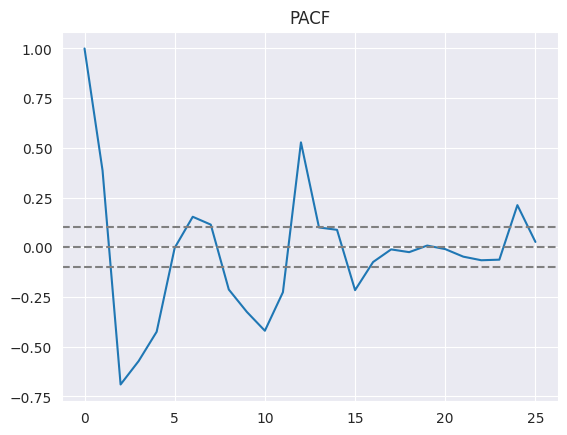

In [ ]:
plt.plot( lag_acf )

plt.axhline( y = 1.96 / (np.sqrt( ( len( dados_diff ) - 1 ) ) ), linestyle = '--', color = 'gray' )

plt.axhline( y = 0 / (np.sqrt( ( len( dados_diff ) - 1 ) ) ), linestyle = '--', color = 'gray' )

plt.axhline( y = -1.96 / (np.sqrt( ( len( dados_diff ) - 1 ) ) ), linestyle = '--', color = 'gray' )

plt.title('ACF')
plt.show()

plt.plot( lag_pacf )

plt.axhline( y = 1.96 / (np.sqrt( ( len( dados_diff ) - 1 ) ) ), linestyle = '--', color = 'gray' )

plt.axhline( y = 0 / (np.sqrt( ( len( dados_diff ) - 1 ) ) ), linestyle = '--', color = 'gray' )

plt.axhline( y = -1.96 / (np.sqrt( ( len( dados_diff ) - 1 ) ) ), linestyle = '--', color = 'gray' )

plt.title('PACF')
plt.show()

In [ ]:
# A( x, y, z )
# A( 2, 2, )

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

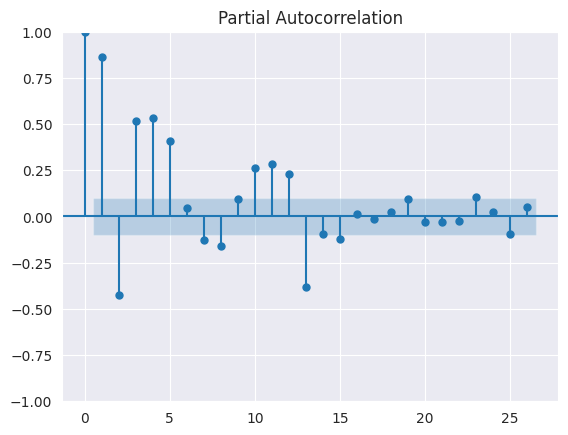

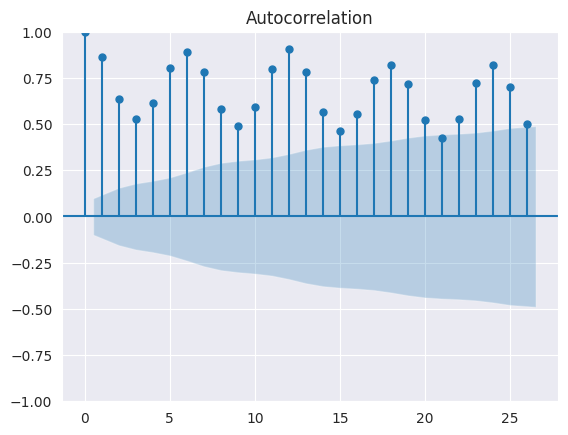

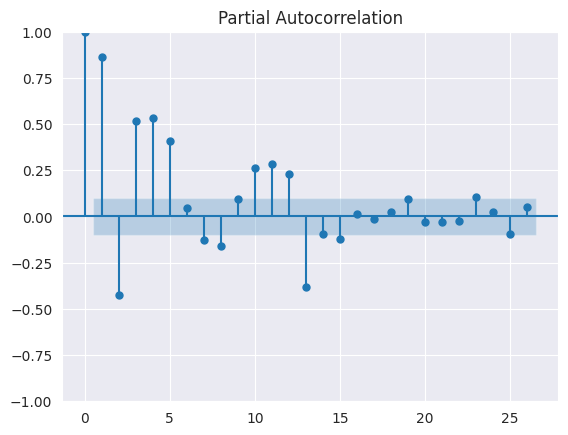

In [ ]:
plot_acf( dados['Value'] )
plot_pacf( dados['Value'] )